_La base des TPs pour le cours "Analyse de données massives 2" a été prise du cours en ligne "Open Machine Learning Course" (https://mlcourse.ai/, __auteur Yury Kashnitsky__)_ 

# <center> TP 1 : Analyse exploratoire et analyse visuelle de données avec la librairie Pandas et Seaborn

##  <center> Analyse des données de maladies cardiovasculaires

Pour vous entraîner avec les librairies Pandas et Seaborn, et aussi l’AED (Analyse Exploratoire de Données), vous pouvez remplir les lignes ci-dessous où vous analyserez un ensemble de données sur les maladies cardiovasculaires.

### Problème

Prédire la présence ou l'absence de maladie cardiovasculaire (MCV) en utilisant les résultats de l'examen du patient.

### Description des données

Il existe 3 types de caractéristiques d'entrée:

- *Objectives*: informations factuelles;
- *Examinées*: résultats d'un examen médical;
- *Subjectives*: informations données par le patient.

La description des données en anglais :

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Toutes les valeurs du dataset ont été collectées au moment de l'examen médical.

# Partie 1. Analyse préliminaire des données

Tout d'abord, nous allons initialiser l'environnement:

**Ex.1 : Importez tout les bibliothèques nécessaires : `pandas`, `numpy` et `seaborn`**

In [1]:
# You code here

Configurons les bibliothèques `seaborn` and `matplotlib` pour l'analyse visuelle :

In [3]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

**Ex.2 : Chargez les données (en utilisant la méthode `read_csv`) du lien `url` indiqué ci-dessous, et affichez les 5 premières lignes en utilisant la méthode `head`:**

In [4]:
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv"

# You code here

**Ex.3 : Examinez les données avec la methode `.info()` et répondez aux questions :**
1. Quelle est la dimensionnalité des données ? 
2. Quels sont les noms et les types de caractéristiques présentées ? 
3. Combien il y a des caractéristiques avec données manquantes `null` ?

In [5]:
# You code here

Il serait instructif de jeter un coup d'oeil aux valeurs de nos variables.

Convertissons les données au format *long* et affichons le nombre de valeurs des entités catégoriques en utilisant [`factorplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html).

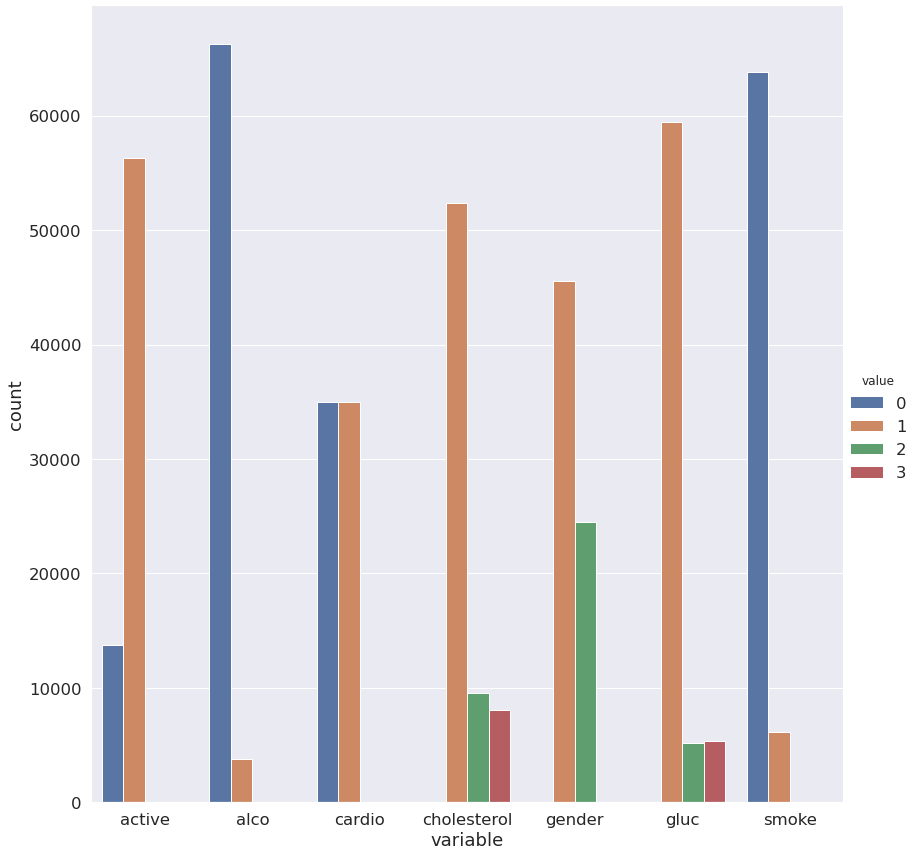

In [9]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

Nous pouvons voir que les classes cibles sont équilibrées. C'est génial !

Separons l'ensemble des données selon les valeurs cibles. Peut-on déjà repérer la caractéristique la plus significative simplement en regardant les graphiques ?

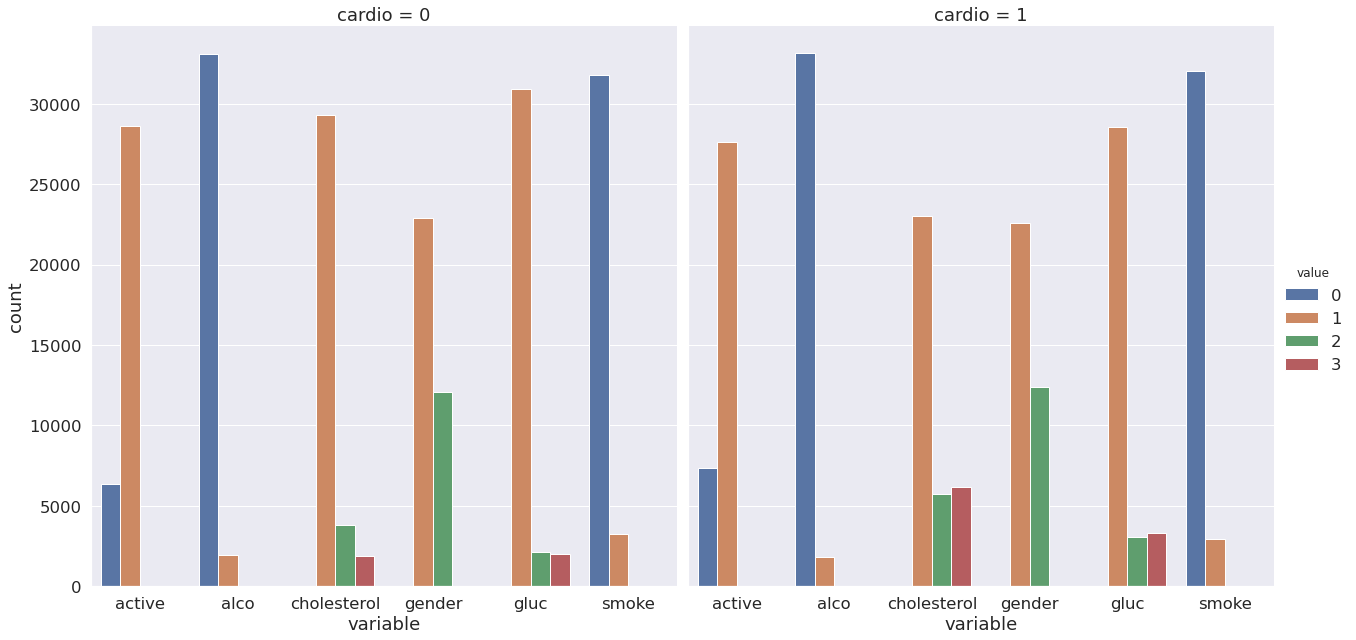

In [11]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);

On peut voir que la distribution des niveaux de cholestérol et de glucose diffère grandement par la valeur de la variable cible. Est-ce une coïncidence?

Maintenant, calculons quelques statistiques pour les valeurs uniques de la caracteristique:

In [20]:
print("All features unique values : \n")
print("\t", 10 * '-')
for c in df.columns:
    n = df[c].nunique()
    print("\t", c)
    if n <= 3:
        print("\t", n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print("\t", n)
    print("\t", 10 * '-')

All features unique values : 

	 ----------
	 id
	 70000
	 ----------
	 age
	 8076
	 ----------
	 gender
	 2 [(1, 45530), (2, 24470)]
	 ----------
	 height
	 109
	 ----------
	 weight
	 287
	 ----------
	 ap_hi
	 153
	 ----------
	 ap_lo
	 157
	 ----------
	 cholesterol
	 3 [(1, 52385), (2, 9549), (3, 8066)]
	 ----------
	 gluc
	 3 [(1, 59479), (2, 5190), (3, 5331)]
	 ----------
	 smoke
	 2 [(0, 63831), (1, 6169)]
	 ----------
	 alco
	 2 [(0, 66236), (1, 3764)]
	 ----------
	 active
	 2 [(0, 13739), (1, 56261)]
	 ----------
	 cardio
	 2 [(0, 35021), (1, 34979)]
	 ----------


**Finalement, nous avons:**
- 5 caractéristiques numériques (hors *id*);
- 7 caractéristiques catégoriques;
- 70000 enregistrements au total.

## 1.1. Observations basiques

**Ex. 4 : Combien d'hommes et de femmes sont présents dans cet ensemble de données ?** 

Les valeurs de la caractéristique `gender` n'ont pas été données (c'est pas clair que "1" représente les femmes ou les hommes) - déterminez-le en analysant la taille, en supposant que les hommes sont plus grands en moyenne.

In [ ]:
# You code here

**Ex. 5 : Quel `gender` déclare le plus souvent consommer de l'alcool - hommes ou femmes ?**

In [ ]:
# You code here

**Ex. 6 : Quelle est la différence entre les pourcentages de fumeurs chez les hommes et les femmes (arrondi) ?**

In [ ]:
# You code here

**Ex. 7 : Quelle est la différence entre les valeurs médianes d'âge chez les fumeurs et les non-fumeurs (en mois, arrondies) ?** 

Vous devrez déterminer les unités de la caractéristique `age_in_month` dans cet ensemble de données.

In [ ]:
# You code here

## 1.2. Les cartes de risque (Bonus)

Sur le site de la société européenne de cardiologie [l'échelle de SCORE ](https://www.escardio.org/Education/Practice-Tools/CVD-prevention-toolbox/SCORE-Risk-Charts) est fournie. Elle est utilisée pour calculer le risque de décès d'une maladie cardiovasculaire (MCV) dans les 10 prochaines années :
<img src=https://habrastorage.org/webt/ik/gx/hr/ikgxhr3w1vzqihgitgrbdorfb14.png width=60%>

Jetons un coup d'oeil au rectangle supérieur droit, qui montre un sous-ensemble d'hommes fumeurs âgés de 60 à 65. (Il n'est pas évident, mais les valeurs de la figure représentent la limite supérieure).

Nous voyons la valeur 9 dans le coin inférieur gauche du rectangle et 47 dans le coin supérieur droit. Cela signifie que, pour les personnes de ce groupe de sexe-âge dont la pression systolique est inférieure à 120, le risque d'une MCV est estimé à 5 fois plus faible que pour ceux avec la pression dans l'intervalle [160,180].

**Ex. 8 (Bonus) : Calculez le même ratio en utilisant nos données.**

Clarifications :
- Calculez la fonction `age_years` - arrondissez l'âge au nombre d'années le plus proche. Et pour cette tâche, sélectionnez uniquement les personnes de 60 à 64 ans inclusivement.
- Les catégories de taux de cholestérol diffèrent entre la figure et notre ensemble de données. La conversion pour la fonction `cholestérol` est la suivante: 4 mmol/l $\rightarrow$ 1; 5-7 mmol/l $\rightarrow$ 2; 8 mmol/l $\rightarrow$ 3.

In [ ]:
# You code here

**Ex.9 (Bonus) : Calculez la fraction des personnes atteintes d'une MCV pour les deux segments décrits ci-dessus. Quel est le rapport de ces deux fractions?**

In [ ]:
# You code here

## 1.3. Analyse du BMI (Body Mass Index)

**Ex. 10 : Créez une nouvelle caracteristique – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)).**

Pour ce faire, divisez le poids en kilogrammes par le carré de la taille en mètres. On dit que les valeurs normales du BMI sont de 18,5 à 25.

In [ ]:
# You code here

**Ex. 11 : Choisissez les expressions correctes et argumentez votre choix :**

1. La medianne du BMI dans les données se situe dans la plage des valeurs normales du BMI.
2. Le BMI des femmes est en moyenne plus élevé que celui des hommes.
3. Les personnes en bonne santé ont, en moyenne, un BMI plus élevé que les personnes atteintes d'une MCV.
4. Pour les hommes en bonne santé qui ne boivent pas, le BMI est plus proche de la norme que pour les femmes en bonne santé qui ne boivent pas.

In [ ]:
# You code here

# Part 2. Analyse visuelle des données

## 2.1. Visualisation de matrice de corrélation

Pour mieux comprendre les caractéristiques, vous pouvez créer une matrice des coefficients de corrélation entre les entités. 

**Ex. 12 : Creez une matrice de corrélation en utilisant [`heatmap()`](http://seaborn.pydata.org/generated/seaborn.heatmap.html). Vous pouvez aussi créer la matrice en utilisant les outils standard 'pandas' avec les paramètres par défaut.**

In [ ]:
# You code here

**Ex. 13 : Quelle paire de caractéristiques a la plus forte corrélation de Pearson avec la caractéristique `gender` ?**

In [ ]:
# You code here

## 2.2. Répartition de la taille des hommes et des femmes

De notre exploration des valeurs uniques plus tôt, nous savons que le genre est codé par les valeurs *1* et *2*. Même si vous ne connaissez pas le mappage de ces valeurs au genre, vous pouvez le comprendre graphiquement en regardant les valeurs moyennes de la taille et du poids pour chaque valeurs de la fonction `gender`.

**Ex. 14 : Créez un violinplot pour la hauteur et le genre en utilisant [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Utilisez les paramètres :**
- `hue` pour diviser par genre;
- `scale` pour évaluer le nombre d'enregistrements pour chaque sexe.

Pour que le tracé soit rendu correctement, vous devez convertir votre `DataFrame` au format `long` en utilisant la fonction `melt()` de `pandas`. Voici [un example](https://stackoverflow.com/a/41575149/3338479) pour votre référence.

In [21]:
# You code here

## 2.3. Age

Auparavant, nous calculions l'âge des répondants en années au moment de l'examen.

**Ex. 15 : Creez un `count plot` en utilisant [`countplot()`](http://seaborn.pydata.org/generated/seaborn.countplot.html) avec l'age sur l'axe *X* et le nombre de personnes sur l'axe *Y*.**

En définitive, votre graphique devrait avoir deux colonnes pour chaque âge, correspondant au nombre de personnes pour chaque classes *cardio* de cet âge.

In [ ]:
# You code here

**Ex. 16 : Quel est le plus petit âge auquel le nombre de personnes atteintes d'une MCV dépasse le nombre de personnes sans MCV ?**

In [ ]:
# You code here